In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
az.style.use("arviz-grayscale")
plt.rcParams['figure.dpi'] = 400

import statsmodels
import statsmodels.formula.api as smf

In [2]:
np.random.seed(123)
n = 100
X = np.random.normal(20, 100, n).round()
epsilon = np.random.normal(0, 20, n)
y = 4 + 7 * X + epsilon
data = pd.DataFrame(dict(y=y, X=X, epsilon=epsilon))
data.head(5)

,y,X,epsilon
0,-606.158906,-89.0,12.841094
1,804.442241,120.0,-39.557759
2,354.245293,48.0,14.245293
3,-861.033921,-131.0,51.966079
4,-262.492520,-38.0,-0.492520


In [3]:
mod = smf.ols("y~X", data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.625e+05
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          1.37e-159
Time:                        00:21:51   Log-Likelihood:                -438.41
No. Observations:                 100   AIC:                             880.8
Df Residuals:                      98   BIC:                             886.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6838      1.999      1.843      0.068      -0.283       7.650
X              6.9967      0.017    403.054      0.000       6.962       7.031
==============================================================================
Omnibus:                        5.028   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.133
Skew:                          -0.308   Prob(JB):                       0.0768
Kurtosis:                       3.924   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
with pm.Model() as model:

    σ = pm.Normal("σ", 0, 20)
    beta0 = pm.Normal("β_0", 0, 10)
    beta1 = pm.Normal("β_1", 0, 10)
    μ = pm.Deterministic("μ", beta0 + beta1 * data.X)
    y = pm.Normal("mass", mu=μ, sigma=σ, observed=data.y)

    model = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, β_0, β_1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


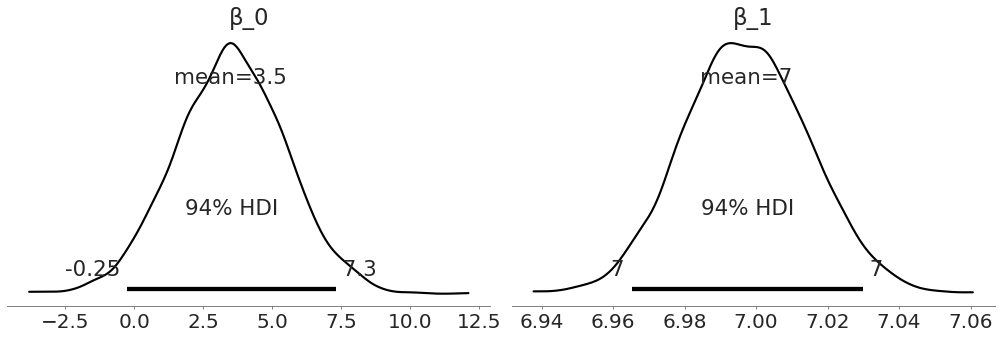

In [8]:
axes = az.plot_posterior(model, var_names = ["β_0", "β_1"], textsize=20);